#  <font color='#008ae6'>Group 42
### Name (ID):<span style="background-color: lightgreen"> Priyanka Jagota (0755573)
### Name (ID):<span style="background-color: lightgreen"> Aditya Danturthi (0756019)
### Name (ID):<span style="background-color: lightgreen"> Anirudh Rajaram (0754920)
### Name (ID):<span style="background-color: lightgreen"> Tejal Dalvi (0756090)
### Name (ID):<span style="background-color: lightgreen"> Sharanjit kaur (0755577)

#  <font color='#008ae6'>Import the Libraries and Data

- ### Import Libraries

In [45]:
import pandas as pd # Importing pandas for data manipulation and analysis
import numpy as np # to import numpy library as np
from sklearn.model_selection import train_test_split # to split the data into train and test data
import seaborn as sns # import seaborn library to plot graphs
import matplotlib.pyplot as plt # to import matplotlib library
from sklearn.feature_selection import SelectKBest, f_classif, chi2 # to import the feature selection libraries
from sklearn.neighbors import KNeighborsClassifier # to import k neighbour classifier mode;
from sklearn.metrics import classification_report # to import classification report metrics
from sklearn.model_selection import train_test_split # to import the library which further help in splitting the dataset in test and train sets
from sklearn.metrics import roc_auc_score # to import auc score
from sklearn.model_selection import GridSearchCV # to import grid search cv for hypertuning
import warnings # to ignore warnings
warnings.filterwarnings('ignore') # to avoid warnings


- ### Import Data

In [46]:
df=pd.read_csv("hmeq.csv") # to import csv file as data frame

#  <font color='#008ae6'>Data Exploration

- ### Check top few rows of the data

In [47]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


- ### Check bottom few rows of the data

In [48]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


- ### Check statistics of the data


In [49]:
df.describe() # to generate statistical description of each column of our data

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


- ### Check datatype of each feature of the data


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


- ### Visualize the distribution of Numerical features in the data


<AxesSubplot:xlabel='CLNO', ylabel='Density'>

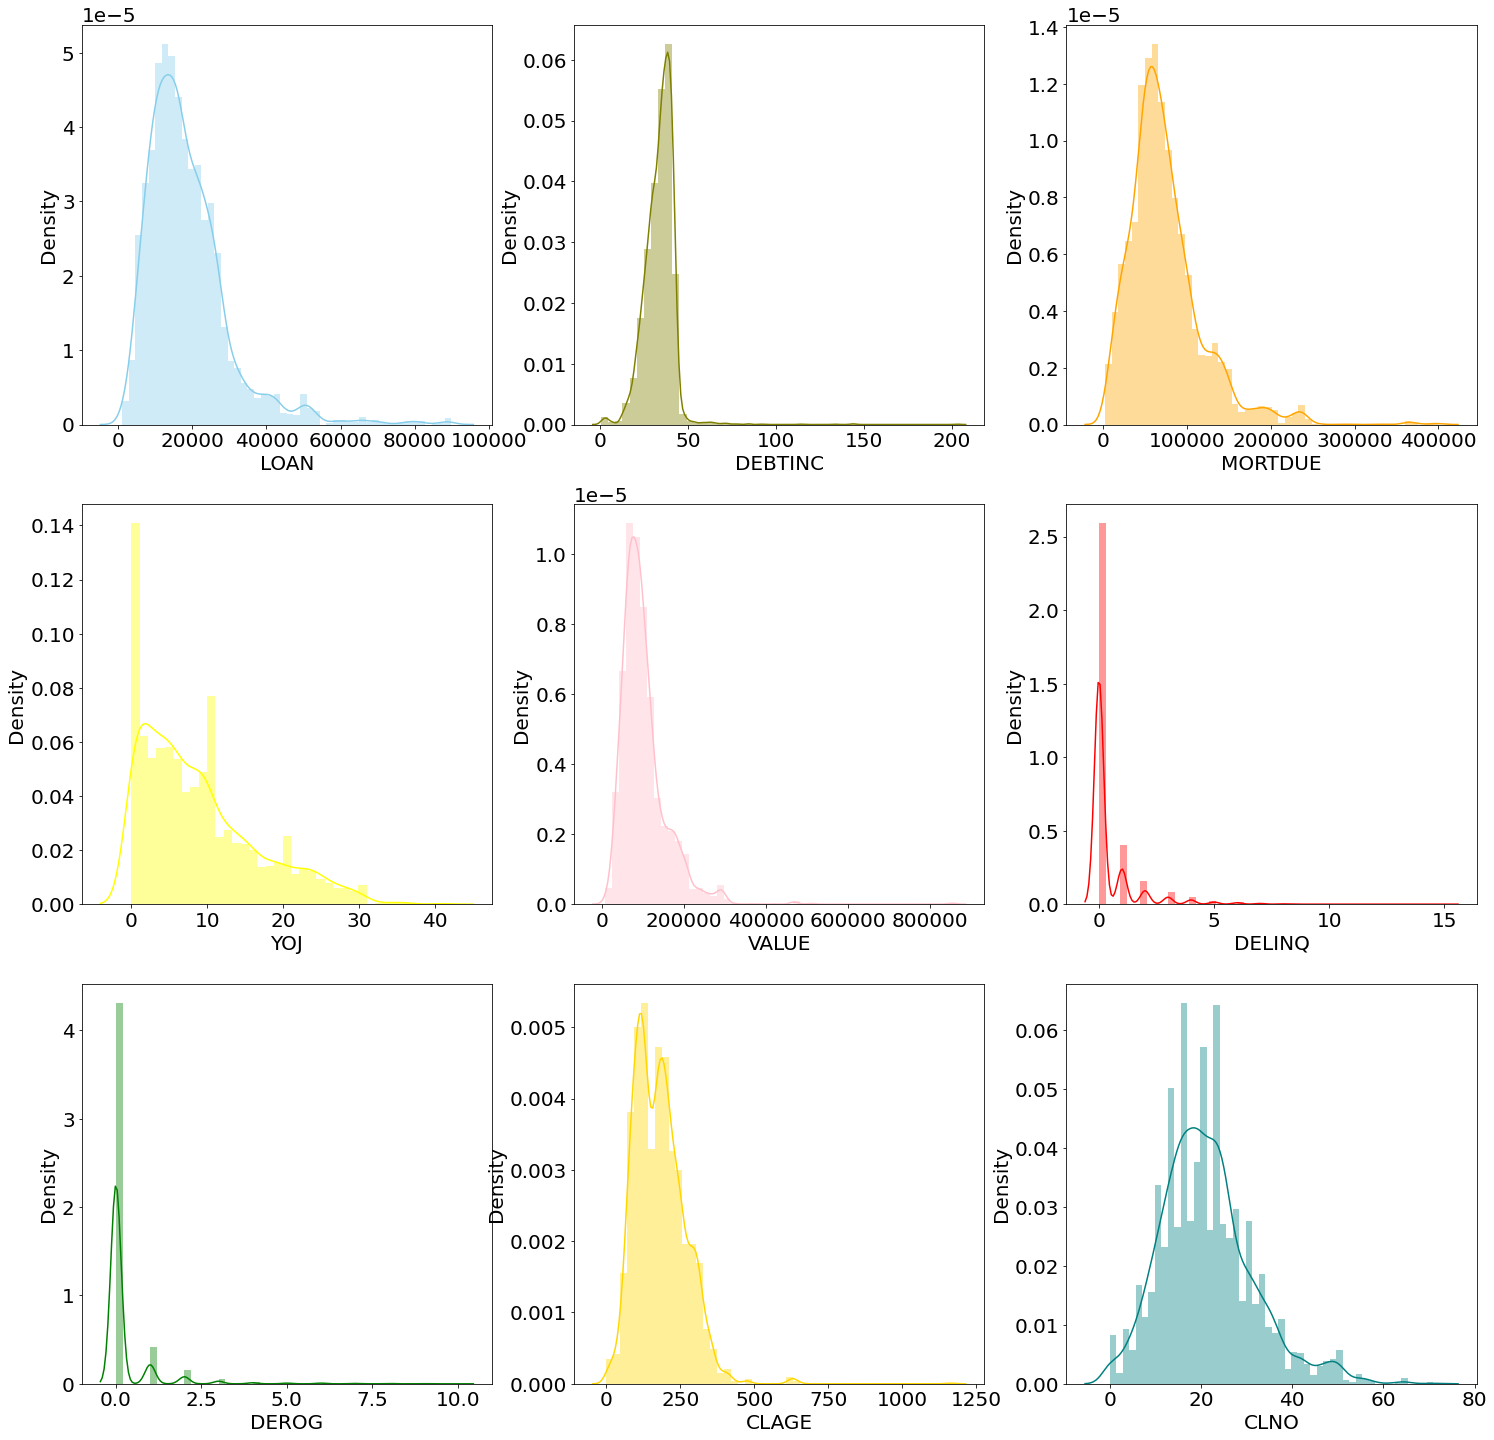

In [51]:
# visualizing numeric variables using seaborn
import matplotlib as mpl
mpl.rcParams['font.size'] =20
f, axes = plt.subplots(3, 3, figsize=(25,25))
sns.distplot( df["LOAN"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["DEBTINC"] , color="olive", ax=axes[0, 1])
sns.distplot( df["MORTDUE"] , color="orange", ax=axes[0, 2])
sns.distplot( df["YOJ"] , color="yellow", ax=axes[1, 0])
sns.distplot( df["VALUE"] , color="pink", ax=axes[1, 1])
sns.distplot( df["DELINQ"] , color="red", ax=axes[1, 2])
sns.distplot( df["DEROG"] , color="green", ax=axes[2, 0])
sns.distplot( df["CLAGE"] , color="gold", ax=axes[2, 1])
sns.distplot( df["CLNO"] , color="teal", ax=axes[2, 2])

- ### Visualize the distribution of Categorical features in the data


<AxesSubplot:title={'center':'Univariant analysis of Reason'}>

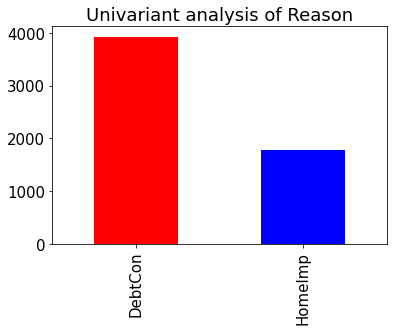

In [52]:
import matplotlib as mpl
mpl.rcParams['font.size'] =15
df['REASON'].value_counts().plot.bar(color=['red','blue'],title='Univariant analysis of Reason')


<AxesSubplot:title={'center':'Univariant analysis of Job'}>

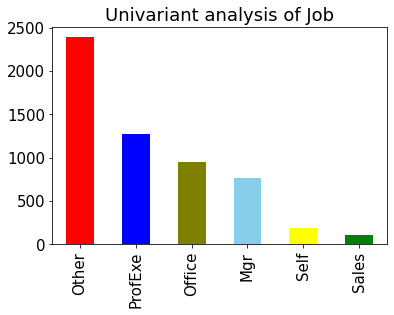

In [53]:
df['JOB'].value_counts().plot.bar(color=['red','blue','olive','skyblue','yellow','green'],title='Univariant analysis of Job')

- ### Correlation matrix to summarize the data and to see the patterns


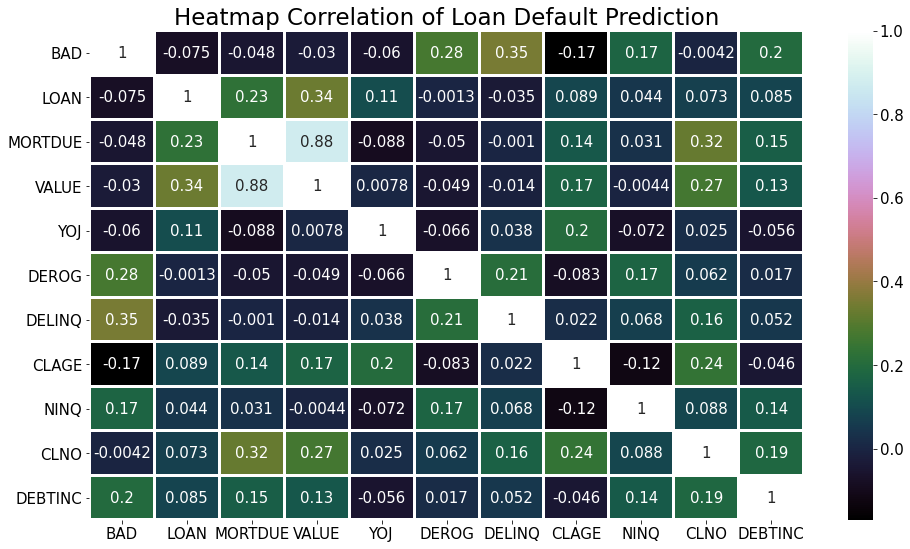

In [54]:
corrMatrix = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corrMatrix, annot=True, cmap="cubehelix",linewidth = 2)
plt.title("Heatmap Correlation of Loan Default Prediction", fontsize = 23)
plt.show()

#  <font color='#008ae6'>Data Preprocessing

- ### Checking Null values in the data


In [55]:
#Checking For Null values in our datasets and then removing the same.
pd.DataFrame(df.isna().sum()) #This will give the snapshot if me have any null values in our dataset.

,0
BAD,0
LOAN,0
MORTDUE,518
VALUE,112
REASON,252
JOB,279
YOJ,515
DEROG,708
DELINQ,580
CLAGE,308


- ### Calculating missing percentage of Null values in the data


In [56]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
BAD,BAD,0.000000
LOAN,LOAN,0.000000
VALUE,VALUE,1.879195
CLNO,CLNO,3.724832
REASON,REASON,4.228188
JOB,JOB,4.681208
CLAGE,CLAGE,5.167785
NINQ,NINQ,8.557047
YOJ,YOJ,8.640940
MORTDUE,MORTDUE,8.691275


- ### Drop Null values in the data


In [57]:
df=df.dropna()
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


- ### Do label encoding in the data


In [58]:
#encoding
df=pd.get_dummies(df, columns=['REASON','JOB'])
df

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0,1,0,1,0,0,0,0
25,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0,1,1,0,0,0,0,0
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1,0,0,0,1,0,0,0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1,0,0,0,1,0,0,0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1,0,0,0,1,0,0,0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1,0,0,0,1,0,0,0


#  <font color='#008ae6'>Feature Extraction

- ### Purpose of feature extraction

  ### Feature selection is the method of decreasing the number of input variables in order to choose only those variables which will be useful in predicting the value of target.</font>

- ### Create separate lists of numerical and categorical columns


In [59]:
numerical_columns = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']# these are columns having numeric values

categorical_columns = ['REASON_DebtCon','REASON_HomeImp','JOB_Mgr','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self'] # these columns have categorical values


- ### Method 1:For selecting significant Numerical features we use "ANOVA" test



In [60]:
select_numerical_features = SelectKBest(f_classif, k=8) # to select best 8 numerical features
Numerical_selected = select_numerical_features.fit(df[numerical_columns], df['BAD']) # to fit the selected features in annova model
scores_numerical = -np.log10(Numerical_selected.pvalues_)# to transform p-values of features into scores

Text(0, 0.5, 'Numerical Features')

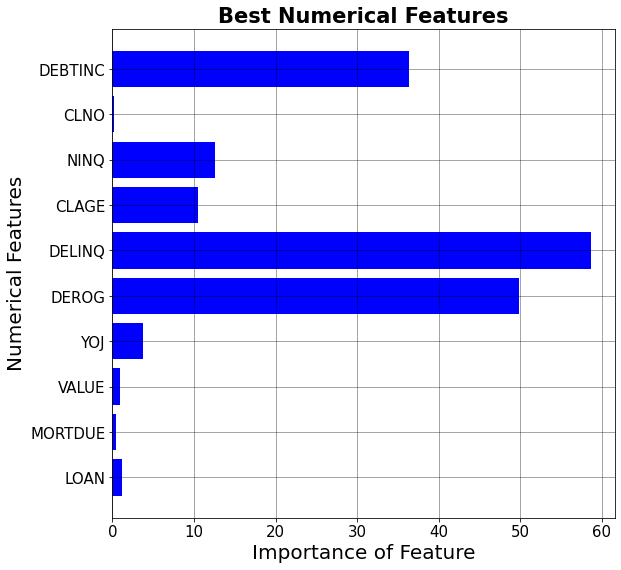

In [61]:
# Figure Size 
fig, ax = plt.subplots(figsize =(9, 9)) 
# Horizontal Bar Plot 
ax.barh(numerical_columns, scores_numerical,color='blue') 
# Add x, y gridlines 
ax.grid(b = True, color ='black', linestyle ='-', linewidth = 0.7, alpha = 1.5) 
# Add title and labels to plot
ax.set_title('Best Numerical Features',fontsize=21,fontweight='bold') 
plt.xlabel('Importance of Feature',fontsize=20) 
plt.ylabel('Numerical Features',fontsize=20)  

In [62]:
# to print the selected numerical features
print('Selected Numerical Features by ANOVA test:', df[numerical_columns].columns[Numerical_selected.get_support()].to_list())

Selected Numerical Features by ANOVA test: ['LOAN', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'DEBTINC']


- ### Method 2:For selecting effecient Categorical features we use "Chi2 test"



In [63]:
select_categorical_features =  SelectKBest(chi2, k=7) # to select best 7 categorical features
Categorical_selected = select_categorical_features.fit(df[categorical_columns],df['BAD'])# to fit the categorical columns in the chi2 test
scores_categorical = -np.log10(Categorical_selected.pvalues_)# to transform p-values of features into scores

Text(0, 0.5, 'Categorical Features')

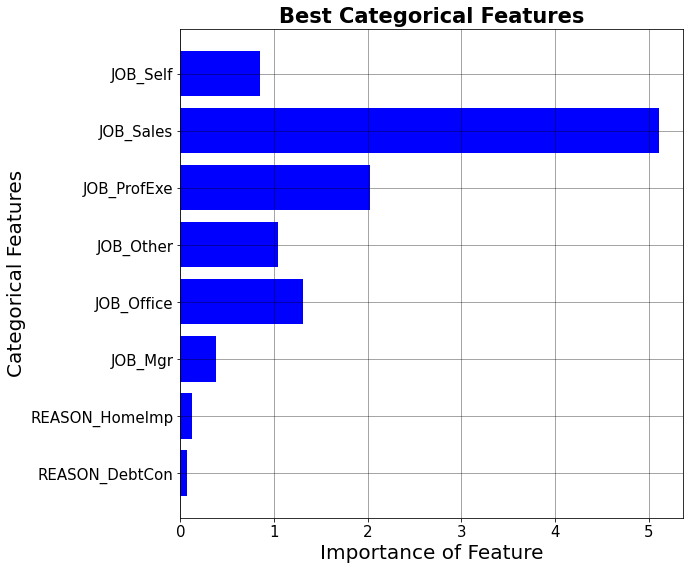

In [64]:
# Figure Size 
fig, ax = plt.subplots(figsize =(9, 9)) 
# Horizontal Bar Plot 
ax.barh(categorical_columns, scores_categorical,color='blue') 
# Add x, y gridlines 
ax.grid(b = True, color ='black', linestyle ='-', linewidth = 0.7, alpha = 1.5) 
# Add title and labels to plot
ax.set_title('Best Categorical Features',fontsize=21,fontweight='bold') 
plt.xlabel('Importance of Feature',fontsize=20) 
plt.ylabel('Categorical Features',fontsize=20)  

In [65]:
# to print the selected numerical features
print('Selected Categorical Features by Chi2 test:', df[categorical_columns].columns[Categorical_selected.get_support()].to_list())

Selected Categorical Features by Chi2 test: ['REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']


- ### Combine the selected features


In [66]:
selected_features = df[['LOAN', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'DEBTINC','JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales']]


- ### Convert the selected features in pandas dataframe


In [67]:
df1 = pd.DataFrame(selected_features)

- ### See few top rows of new dataframe made up of selected features


In [68]:
df1.head()

,LOAN,YOJ,DEROG,DELINQ,CLAGE,NINQ,DEBTINC,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales
5,1700,9.0,0.0,0.0,101.466002,1.0,37.113614,0,1,0,0
7,1800,11.0,0.0,0.0,88.766030,0.0,36.884894,0,1,0,0
19,2300,2.0,0.0,0.0,90.992533,0.0,31.588503,1,0,0,0
25,2400,12.0,0.0,0.0,70.491080,1.0,38.263601,0,0,0,0
26,2400,4.0,0.0,0.0,93.811775,0.0,29.681827,1,0,0,0


#  <font color='#008ae6'>Perform data normalization and split the data

- ### Data Normalization

In [69]:
X = selected_features
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

- ### Split the dataset into train and test sets



In [70]:
y_response = df['BAD'] # to put target column as response variable
X_train, X_test, y_train, y_test = train_test_split(X, y_response, random_state=19)#Splitting the data into train and test sets.
pd.DataFrame(X_train) # to have a look at trained dataset
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (2523, 11) (2523,)
Test (841, 11) (841,)


#  <font color='#008ae6'>Build the models and perform grid search for hypertuning of parameters

- ### Model 1 -: "Random Forest"
  
  


In [71]:
from sklearn.ensemble import RandomForestClassifier
#The structure that Scikit-learn needs to run Grid search
#max_depth=[2,3,4],max_leaf_nodes=[6,10,20],min_samples_split=[20,30,40]
param_grid={'n_estimators':[5,10,15],
            'max_depth':[50,60,70],
           'max_leaf_nodes':[10,15,20,25],
            'min_samples_leaf':[10,15,20,25],
            'criterion': ['gini','entropy']}
from sklearn.model_selection import GridSearchCV
#applying GridSearch on a Decisiontree classifier with a 3 different parameters:
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=11,random_state=573),param_grid,cv=2,return_train_score=True)
grid_search.fit(X_train,y_train)
print("Best parameters:"+str(grid_search.best_params_))
print("Best estimator:"+str(grid_search.best_estimator_))

Best parameters:{'criterion': 'entropy', 'max_depth': 50, 'max_leaf_nodes': 25, 'min_samples_leaf': 15, 'n_estimators': 15}
Best estimator:RandomForestClassifier(criterion='entropy', max_depth=50, max_leaf_nodes=25,
                       min_samples_leaf=15, n_estimators=15, random_state=573)


In [72]:
from sklearn.metrics import accuracy_score
# build a model with the help of best parameters
rf = RandomForestClassifier(criterion='entropy', max_depth=50, max_leaf_nodes=25,
                       min_samples_leaf=15, n_estimators=15, random_state=19)
rf.fit(X_train, y_train)
# to predict the target values
pred_rf_test = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)
score_train_rf = accuracy_score(y_train,pred_rf_train )*100
score_test_rf = accuracy_score(y_test,pred_rf_test )*100

# to find the accuracy of the model on training and testing data
print("Accuracy on  Train data : {}".format(accuracy_score(y_train,pred_rf_train)*100) )
print("Accuracy on  TEST data : {}".format(accuracy_score(y_test,pred_rf_test)*100) )


Accuracy on  Train data : 93.10344827586206
Accuracy on  TEST data : 92.74673008323424


- ### Model 2 -: "XGBoost"
  

In [73]:
#XGBoost
import warnings # to ignore warnings
warnings.filterwarnings('ignore') # to avoid warnings
from xgboost import XGBClassifier
xg=XGBClassifier(random_state=19)

#List Hyperparameters that we want to tune.

parameter_grid_xg={'learning_rate':[0.05, 0.10, 0.15, 0.20],'max_depth':[3,4,5],'gamma':[ 0.0, 0.1, 0.2 , 0.3]}
gridsearch_xg = GridSearchCV(xg, parameter_grid_xg)
gridsearch_xg.fit(X_train, y_train);

#Get best hyperparameters
gridsearch_xg.best_params_

{'gamma': 0.3, 'learning_rate': 0.15, 'max_depth': 5}

In [88]:
xg_best =XGBClassifier(gamma=0.2,learning_rate=0.15,max_depth=5,random_state=19)
xg_best.fit(X_train, y_train)
pred_xg_test = xg_best.predict(X_test)
score_train_xg=xg_best.score(X_train,y_train)*100
score_test_xg=xg_best.score(X_test,pred_dt_xg )*100
print ("Train accuracy ={:.2f}%".format(xg_best.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(xg_best.score(X_test,y_test)*100))

Train accuracy =98.26%
Test accuracy =94.05%


- ### Model 3 -: "KNN"

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(55,65))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [76]:
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 57


In [77]:
knn=KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=57)
knn.fit(X_train, y_train)
# to predict the target values
pred_knn_test = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)
score_train_knn=accuracy_score(y_train,pred_knn_train)*100
score_test_knn=accuracy_score(y_test,pred_knn_test)*100
# to find the accuracy of the model on training and testing data
print("Accuracy on  Train data : {}".format(accuracy_score(y_train,pred_knn_train)*100) )
print("Accuracy on  TEST data : {}".format(accuracy_score(y_test,pred_knn_test)*100) )

Accuracy on  Train data : 91.43876337693222
Accuracy on  TEST data : 90.36860879904876


- ### Model 4 -: "SVC"

In [78]:
from sklearn.svm import SVC 
# defining parameter range 
Hyper_parameters = {  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
GridSearch_svc = GridSearchCV(estimator = SVC(),
                               param_grid = Hyper_parameters,
                               cv = 10,
                               n_jobs = -1)
GridSearch_svc.fit(X_train, y_train)

print("Best hyperparameters for model:"+str(GridSearch_svc.best_params_))
print("Best estimator for model:"+str(GridSearch_svc.best_estimator_))


Best hyperparameters for model:{'gamma': 0.1, 'kernel': 'rbf'}
Best estimator for model:SVC(gamma=0.1)


In [79]:
# build a model with the help of best parameters
svc = SVC(C=0.1, gamma=0.1,kernel='rbf',probability=True)
svc.fit(X_train, y_train)
# to predict the target values
pred_svc_test = svc.predict(X_test)
pred_svc_train = knn.predict(X_train)
score_train_svc=accuracy_score(y_train,pred_svc_train)*100
score_test_svc=accuracy_score(y_test,pred_svc_test)*100
# to find the accuracy of the model on training and testing data
print("Accuracy on  Train data : {}".format(accuracy_score(y_train,pred_svc_train)*100) )
print("Accuracy on  TEST data : {}".format(accuracy_score(y_test,pred_svc_test)*100) )

Accuracy on  Train data : 91.43876337693222
Accuracy on  TEST data : 90.24970273483947


- ### Model 5 : "Decision tree"

In [80]:
from sklearn.tree import DecisionTreeClassifier 
#The structure that Scikit-learn needs to run Grid search
#max_depth=[2,3,4],max_leaf_nodes=[6,10,20],min_samples_split=[20,30,40]
param_grid={'max_depth':[3,4,5],
           'max_leaf_nodes':[10,15,20],
            'min_samples_leaf':[10,15,20,25]}
from sklearn.model_selection import GridSearchCV
#applying GridSearch on a Decisiontree classifier with a 3 different parameters:
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=11,random_state=573),param_grid,cv=2,return_train_score=True)
grid_search.fit(X_train,y_train)
print("Best parameters:"+str(grid_search.best_params_))
print("Best estimator:"+str(grid_search.best_estimator_))

Best parameters:{'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 10}
Best estimator:RandomForestClassifier(max_depth=5, max_leaf_nodes=15, min_samples_leaf=10,
                       n_estimators=11, random_state=573)


In [81]:
dt =DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, min_samples_leaf=10, random_state=573)
dt.fit(X_train, y_train)
# to predict the target values
pred_dt_test = dt.predict(X_test)
pred_dt_train = dt.predict(X_train)
score_train_dt=accuracy_score(y_train,pred_dt_train)*100
score_test_dt=accuracy_score(y_test,pred_dt_test)*100
# to find the accuracy of the model on training and testing data
print("Accuracy on  Train data : {}".format(accuracy_score(y_train,pred_dt_train)*100) )
print("Accuracy on  TEST data : {}".format(accuracy_score(y_test,pred_dt_test)*100) )

Accuracy on  Train data : 93.46016646848989
Accuracy on  TEST data : 93.22235434007135


#  <font color='#008ae6'>Evaluate the above models

- ## Random Forest

#### <font color='#b30000'>*`Accuracies`-: In the chart we have compared the training and test accuracy of the model*</font>


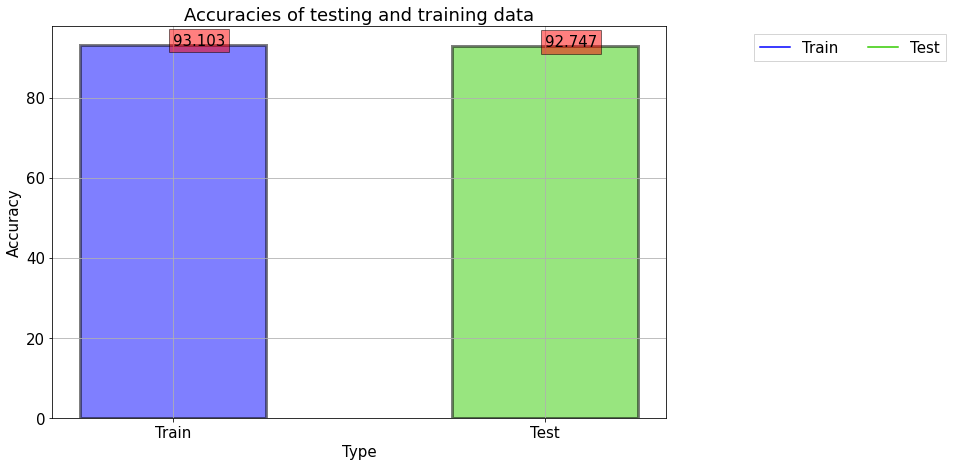

In [82]:
f, ax1 = plt.subplots()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax1.bar('Train',score_train_rf,width=0.5, alpha=0.5,edgecolor='black',linewidth=3,color='#0000ff')# to call bar function
plt.plot('Train',score_train_rf,label="Train",color='#0000ff')# to create a label 
ax1.text(0,score_train_rf,round(score_train_rf,3),bbox=dict(facecolor='red', alpha=0.5))# to put text on bar
                   
# to draw bar plot for testing data
ax1.bar('Test',score_test_rf,width=0.5, alpha=0.5,edgecolor='black',linewidth=3,color='#33cc00')# to call bar function
ax1.text(1,score_test_rf,round(score_test_rf,3),bbox=dict(facecolor='red', alpha=0.5))# to create a label
plt.plot('Test',score_test_rf,label="Test",color='#33cc00')# to put text on bar
# to put labels on axes 
ax1.set(xlabel='Type', ylabel='Accuracy',title='Accuracies of testing and training data')
ax1.legend(['Train', 'Test'],loc='upper center', bbox_to_anchor=(1.3,1),fancybox=False, shadow=False, ncol=3)
plt.grid()
# to draw bar plot for training data
plt.gcf().set_size_inches(11, 8)
plt.show()

#### <font color='#b30000'>*`Classification report`-: It is used to measure the quality of predictions from a classification algorithm.It tells that how many predictions are True and how many are False.*</font>


In [83]:
# The classification report for the model:
from sklearn.metrics import classification_report
print('-----CLASSIFICATION  REPORT IS------')
print(classification_report(y_test,pred_rf_test))         

-----CLASSIFICATION  REPORT IS------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       759
           1       1.00      0.26      0.41        82

    accuracy                           0.93       841
   macro avg       0.96      0.63      0.68       841
weighted avg       0.93      0.93      0.91       841



#### <font color='#b30000'>*`Confusion Matrix`-:A confusion matrix is a technique which is used to summarize the performance of a classification algorithm.Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.*</font>

-------CONFUSION MATRIX IS--------
[[759   0]
 [ 61  21]]


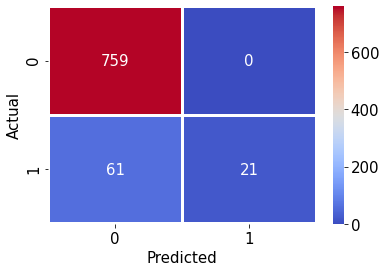

In [84]:
#This is the confusion matrix for the K neighbor Classifier classifier:
from sklearn.metrics import confusion_matrix
print('-------CONFUSION MATRIX IS--------')
print(confusion_matrix(y_test,pred_rf_test))
confusion_matrix = pd.crosstab(y_test,pred_rf_test, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True,linewidth = 2,fmt="d",cmap= 'coolwarm')
plt.show()

#### <font color='#b30000'>*`AUC and ROC curve` -: AUC stands for "Area Under Curve" whereas ROC means "Receiver Operating Characteristics". ROC Curve and AUC values tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.*</font>

 ----AUC:----- 0.8697499919663227
**************************************************************************************************


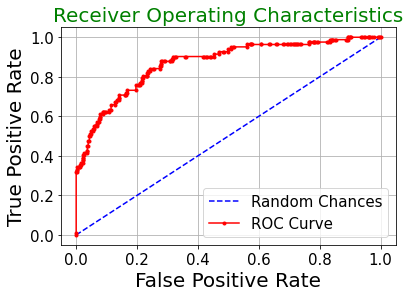

In [85]:
# to plot roc curve for this model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]
auc_rf=roc_auc_score(y_test, y_pred_prob)
# Compute and print AUC score
print(" ----AUC:----- {}".format(roc_auc_score(y_test, y_pred_prob)))
#Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_prob)# to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)# to plot roc curve for the model
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
# show the legend
# show the grid
plt.grid()
# show the plot
print('**************************************************************************************************')


- ## XGBoost Model

#### <font color='#b30000'>*`Accuracies`-: In the chart we have compared the training and test accuracy of the model*</font>


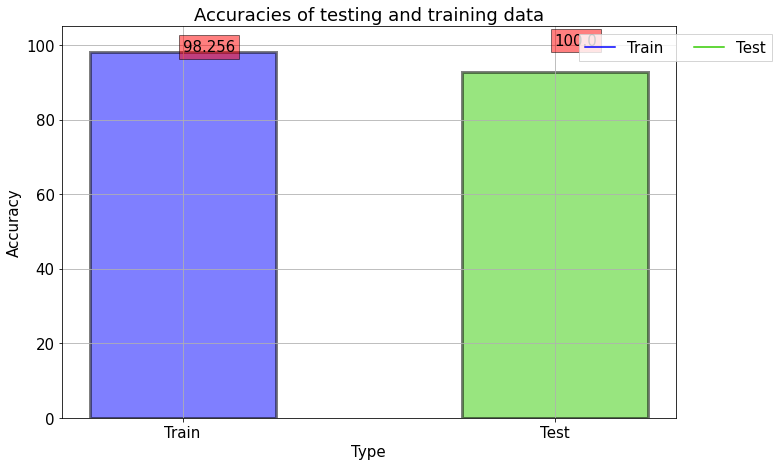

In [86]:
f, ax1 = plt.subplots()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax1.bar('Train',score_train_xg,width=0.5, alpha=0.5,edgecolor='black',linewidth=3,color='#0000ff')# to call bar function
plt.plot('Train',score_train_xg,label="Train",color='#0000ff')# to create a label 
ax1.text(0,score_train_xg,round(score_train_xg,3),bbox=dict(facecolor='red', alpha=0.5))# to put text on bar
                   
# to draw bar plot for testing data
ax1.bar('Test',score_test_rf,width=0.5, alpha=0.5,edgecolor='black',linewidth=3,color='#33cc00')# to call bar function
ax1.text(1,score_test_xg,round(score_test_xg,3),bbox=dict(facecolor='red', alpha=0.5))# to create a label
plt.plot('Test',score_test_xg,label="Test",color='#33cc00')# to put text on bar
# to put labels on axes 
ax1.set(xlabel='Type', ylabel='Accuracy',title='Accuracies of testing and training data')
ax1.legend(['Train', 'Test'],loc='upper center', bbox_to_anchor=(1,1),fancybox=False, shadow=False, ncol=3)
plt.grid()
# to draw bar plot for training data
plt.gcf().set_size_inches(11, 8)
plt.show()

#### <font color='#b30000'>*`Classification report`-: It is used to measure the quality of predictions from a classification algorithm.It tells that how many predictions are True and how many are False.*</font>


In [89]:
# The classification report for the model:
from sklearn.metrics import classification_report
print('-----CLASSIFICATION  REPORT IS------')
print(classification_report(y_test,pred_xg_test))         

-----CLASSIFICATION  REPORT IS------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       759
           1       0.97      0.40      0.57        82

    accuracy                           0.94       841
   macro avg       0.95      0.70      0.77       841
weighted avg       0.94      0.94      0.93       841



#### <font color='#b30000'>*`Confusion Matrix`-:A confusion matrix is a technique which is used to summarize the performance of a classification algorithm.Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.*</font>

-------CONFUSION MATRIX IS--------
[[758   1]
 [ 49  33]]


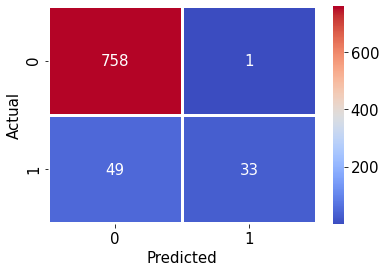

In [90]:
#This is the confusion matrix for the K neighbor Classifier classifier:
from sklearn.metrics import confusion_matrix
print('-------CONFUSION MATRIX IS--------')
print(confusion_matrix(y_test,pred_xg_test))
confusion_matrix = pd.crosstab(y_test,pred_xg_test, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True,fmt="d",linewidth = 2,cmap= 'coolwarm')
plt.show()

#### <font color='#b30000'>*`AUC and ROC curve` -: AUC stands for "Area Under Curve" whereas ROC means "Receiver Operating Characteristics". ROC Curve and AUC values tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.*</font>

 ----AUC:----- 0.911501012243324
**************************************************************************************************


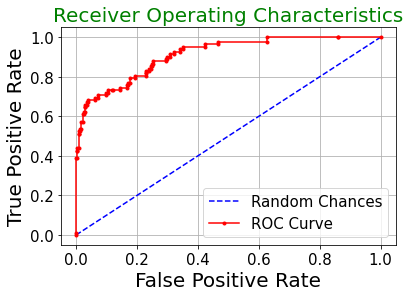

In [92]:
# to plot roc curve for this model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# Compute predicted probabilities: y_pred_prob
y_pred_prob = xg_best.predict_proba(X_test)[:,1]
# Compute and print AUC score
print(" ----AUC:----- {}".format(roc_auc_score(y_test, y_pred_prob)))
#Plot ROC Curve
auc_xg=roc_auc_score(y_test, y_pred_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_prob)# to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)# to plot roc curve for the model
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
# show the legend
# show the grid
plt.grid()
# show the plot
print('**************************************************************************************************')


- ## KNN

#### <font color='#b30000'>*`Accuracies`-: In the chart we have compared the training and test accuracy of the model*</font>


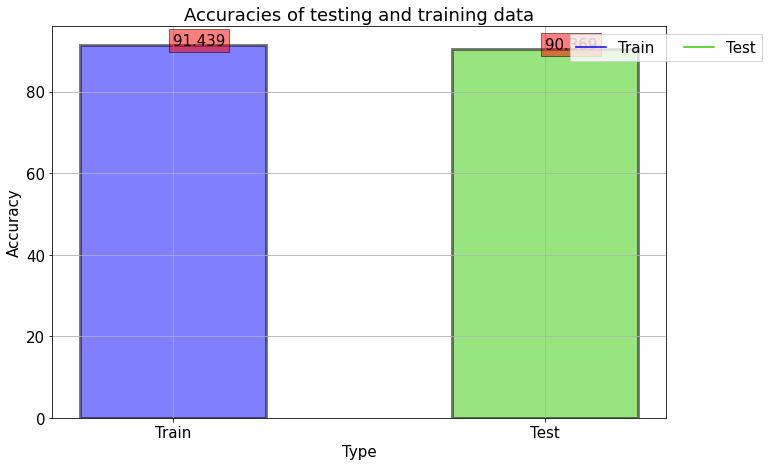

In [93]:
f, ax1 = plt.subplots()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax1.bar('Train',score_train_knn,width=0.5, alpha=0.5,edgecolor='black',linewidth=3,color='#0000ff')# to call bar function
plt.plot('Train',score_train_knn,label="Train",color='#0000ff')# to create a label 
ax1.text(0,score_train_knn,round(score_train_knn,3),bbox=dict(facecolor='red', alpha=0.5))# to put text on bar
                   
# to draw bar plot for testing data
ax1.bar('Test',score_test_knn,width=0.5, alpha=0.5,edgecolor='black',linewidth=3,color='#33cc00')# to call bar function
ax1.text(1,score_test_knn,round(score_test_knn,3),bbox=dict(facecolor='red', alpha=0.5))# to create a label
plt.plot('Test',score_test_knn,label="Test",color='#33cc00')# to put text on bar
# to put labels on axes 
ax1.set(xlabel='Type', ylabel='Accuracy',title='Accuracies of testing and training data')
ax1.legend(['Train', 'Test'],loc='upper center', bbox_to_anchor=(1,1),fancybox=False, shadow=False, ncol=3)
plt.grid()
# to draw bar plot for training data
plt.gcf().set_size_inches(11, 8)
plt.show()

#### <font color='#b30000'>*`Classification report`-: It is used to measure the quality of predictions from a classification algorithm.It tells that how many predictions are True and how many are False.*</font>


In [94]:
# The classification report for the model:
from sklearn.metrics import classification_report
print('-----CLASSIFICATION  REPORT IS------')
print(classification_report(y_test,pred_knn_test))         

-----CLASSIFICATION  REPORT IS------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       759
           1       1.00      0.01      0.02        82

    accuracy                           0.90       841
   macro avg       0.95      0.51      0.49       841
weighted avg       0.91      0.90      0.86       841



#### <font color='#b30000'>*`Confusion Matrix`-:A confusion matrix is a technique which is used to summarize the performance of a classification algorithm.Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.*</font>

-------CONFUSION MATRIX IS--------
[[759   0]
 [ 81   1]]


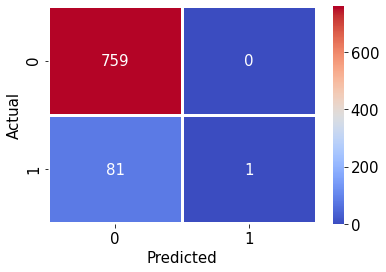

In [95]:
#This is the confusion matrix for the K neighbor Classifier classifier:
from sklearn.metrics import confusion_matrix
print('-------CONFUSION MATRIX IS--------')
print(confusion_matrix(y_test,pred_knn_test))
confusion_matrix = pd.crosstab(y_test,pred_knn_test, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True,fmt="d",linewidth = 2,cmap= 'coolwarm')
plt.show()

#### <font color='#b30000'>*`AUC and ROC curve` -: AUC stands for "Area Under Curve" whereas ROC means "Receiver Operating Characteristics". ROC Curve and AUC values tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.*</font>

 ----AUC:----- 0.818495131591632
**************************************************************************************************


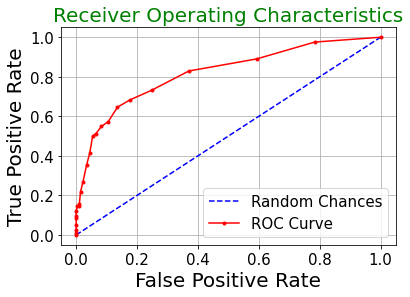

In [96]:
# to plot roc curve for this model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]
# Compute and print AUC score
auc_knn=roc_auc_score(y_test, y_pred_prob)
print(" ----AUC:----- {}".format(roc_auc_score(y_test, y_pred_prob)))
#Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_prob)# to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)# to plot roc curve for the model
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
# show the legend
# show the grid
plt.grid()
# show the plot
print('**************************************************************************************************')


- ## SVC

#### <font color='#b30000'>*`Accuracies`-: In the chart we have compared the training and test accuracy of the model*</font>


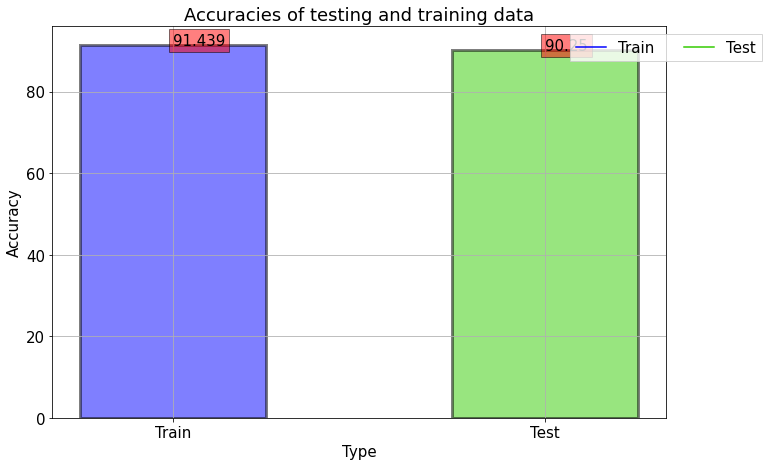

In [97]:
f, ax1 = plt.subplots()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax1.bar('Train',score_train_svc,width=0.5, alpha=0.5,edgecolor='black',linewidth=3,color='#0000ff')# to call bar function
plt.plot('Train',score_train_svc,label="Train",color='#0000ff')# to create a label 
ax1.text(0,score_train_svc,round(score_train_svc,3),bbox=dict(facecolor='red', alpha=0.5))# to put text on bar
                   
# to draw bar plot for testing data
ax1.bar('Test',score_test_svc,width=0.5, alpha=0.5,edgecolor='black',linewidth=3,color='#33cc00')# to call bar function
ax1.text(1,score_test_svc,round(score_test_svc,3),bbox=dict(facecolor='red', alpha=0.5))# to create a label
plt.plot('Test',score_test_svc,label="Test",color='#33cc00')# to put text on bar
# to put labels on axes 
ax1.set(xlabel='Type', ylabel='Accuracy',title='Accuracies of testing and training data')
ax1.legend(['Train', 'Test'],loc='upper center', bbox_to_anchor=(1,1),fancybox=False, shadow=False, ncol=3)
plt.grid()
# to draw bar plot for training data
plt.gcf().set_size_inches(11, 8)
plt.show()

#### <font color='#b30000'>*`Classification report`-: It is used to measure the quality of predictions from a classification algorithm.It tells that how many predictions are True and how many are False.*</font>


In [98]:
import warnings # to import warnings
warnings.filterwarnings('ignore') # to import warnings as 'ignore'

# The classification report for the model:
from sklearn.metrics import classification_report
print('-----CLASSIFICATION  REPORT IS------')
print(classification_report(y_test,pred_svc_test))         

-----CLASSIFICATION  REPORT IS------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       759
           1       0.00      0.00      0.00        82

    accuracy                           0.90       841
   macro avg       0.45      0.50      0.47       841
weighted avg       0.81      0.90      0.86       841



#### <font color='#b30000'>*`Confusion Matrix`-:A confusion matrix is a technique which is used to summarize the performance of a classification algorithm.Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.*</font>

-------CONFUSION MATRIX IS--------
[[759   0]
 [ 82   0]]


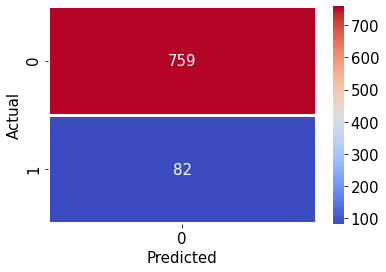

In [99]:
#This is the confusion matrix for the K neighbor Classifier classifier:
from sklearn.metrics import confusion_matrix
print('-------CONFUSION MATRIX IS--------')
print(confusion_matrix(y_test,pred_svc_test))
confusion_matrix = pd.crosstab(y_test,pred_svc_test, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True,fmt="d",linewidth = 2,cmap= 'coolwarm')
plt.show()

#### <font color='#b30000'>*`AUC and ROC curve` -: AUC stands for "Area Under Curve" whereas ROC means "Receiver Operating Characteristics". ROC Curve and AUC values tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.*</font>

 ----AUC:----- 0.8792377647096629
**************************************************************************************************


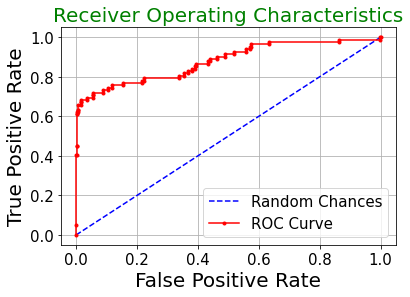

In [100]:
# to plot roc curve for this model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# Compute predicted probabilities: y_pred_prob
y_pred_prob = svc.predict_proba(X_test)[:,1]
# Compute and print AUC score
auc_svc=roc_auc_score(y_test, y_pred_prob)
print(" ----AUC:----- {}".format(roc_auc_score(y_test, y_pred_prob)))
#Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_prob)# to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)# to plot roc curve for the model
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
# show the legend
# show the grid
plt.grid()
# show the plot
print('**************************************************************************************************')


- ## Decision Tree

#### <font color='#b30000'>*`Accuracies`-: In the chart we have compared the training and test accuracy of the model*</font>


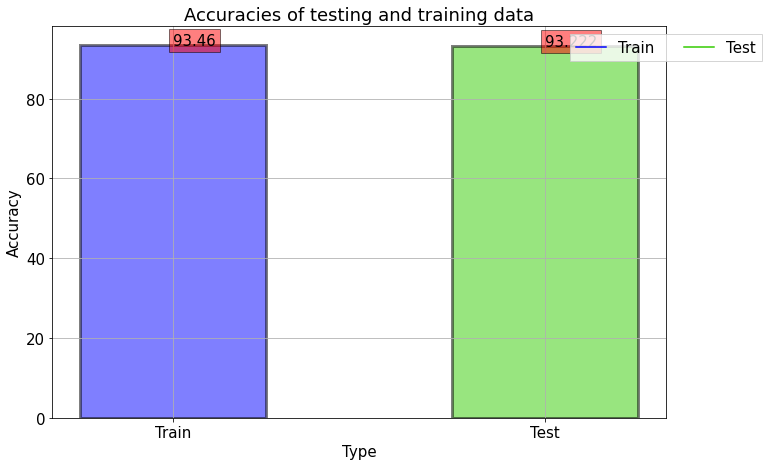

In [101]:
f, ax1 = plt.subplots()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax1.bar('Train',score_train_dt,width=0.5, alpha=0.5,edgecolor='black',linewidth=3,color='#0000ff')# to call bar function
plt.plot('Train',score_train_dt,label="Train",color='#0000ff')# to create a label 
ax1.text(0,score_train_dt,round(score_train_dt,3),bbox=dict(facecolor='red', alpha=0.5))# to put text on bar
                   
# to draw bar plot for testing data
ax1.bar('Test',score_test_dt,width=0.5, alpha=0.5,edgecolor='black',linewidth=3,color='#33cc00')# to call bar function
ax1.text(1,score_test_dt,round(score_test_dt,3),bbox=dict(facecolor='red', alpha=0.5))# to create a label
plt.plot('Test',score_test_dt,label="Test",color='#33cc00')# to put text on bar
# to put labels on axes 
ax1.set(xlabel='Type', ylabel='Accuracy',title='Accuracies of testing and training data')
ax1.legend(['Train', 'Test'],loc='upper center', bbox_to_anchor=(1,1),fancybox=False, shadow=False, ncol=3)
plt.grid()
# to draw bar plot for training data
plt.gcf().set_size_inches(11, 8)
plt.show()

#### <font color='#b30000'>*`Classification report`-: It is used to measure the quality of predictions from a classification algorithm.It tells that how many predictions are True and how many are False.*</font>


In [102]:
import warnings # to import warnings
warnings.filterwarnings('ignore') # to import warnings as 'ignore'

# The classification report for the model:
from sklearn.metrics import classification_report
print('-----CLASSIFICATION  REPORT IS------')
print(classification_report(y_test,pred_dt_test))         

-----CLASSIFICATION  REPORT IS------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       759
           1       0.90      0.34      0.50        82

    accuracy                           0.93       841
   macro avg       0.92      0.67      0.73       841
weighted avg       0.93      0.93      0.92       841



#### <font color='#b30000'>*`Confusion Matrix`-:A confusion matrix is a technique which is used to summarize the performance of a classification algorithm.Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.*</font>

-------CONFUSION MATRIX IS--------
[[756   3]
 [ 54  28]]


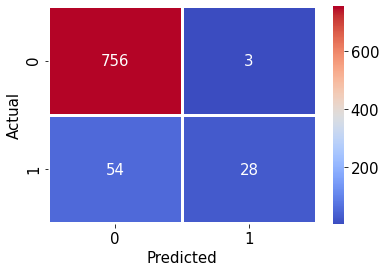

In [103]:
#This is the confusion matrix for the K neighbor Classifier classifier:
from sklearn.metrics import confusion_matrix
print('-------CONFUSION MATRIX IS--------')
print(confusion_matrix(y_test,pred_dt_test))
confusion_matrix = pd.crosstab(y_test,pred_dt_test, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True,fmt="d",linewidth = 2,cmap= 'coolwarm')
plt.show()

#### <font color='#b30000'>*`AUC and ROC curve` -: AUC stands for "Area Under Curve" whereas ROC means "Receiver Operating Characteristics". ROC Curve and AUC values tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.*</font>

 ----AUC:----- 0.795068928950159
**************************************************************************************************


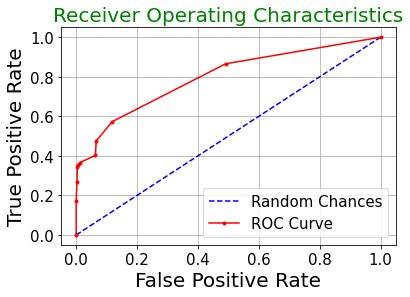

In [104]:
# to plot roc curve for this model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# Compute predicted probabilities: y_pred_prob
y_pred_prob = dt.predict_proba(X_test)[:,1]
# Compute and print AUC score
auc_dt=roc_auc_score(y_test, y_pred_prob)
print(" ----AUC:----- {}".format(roc_auc_score(y_test, y_pred_prob)))
#Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_prob)# to plot random chances
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)# to plot roc curve for the model
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances',color='Blue') # plot the random chances for the model
plt.plot(fpr_dt, tpr_dt, marker='.', label='ROC Curve',color='Red')# plot the roc curve for the model
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristics',fontsize=20,color='green')
plt.legend()
# show the legend
# show the grid
plt.grid()
# show the plot
print('**************************************************************************************************')


#  <font color='#008ae6'>Comparing all the models

- ## Comparing train and test accuracies of all models

In [105]:
label = ['SVC','Decision tree','Random Forest','XG Boost','KNN']
train_acc = [round(score_train_svc,2),round(score_train_dt,2),round(score_train_rf,2),round(score_train_xg,2),round(score_train_knn,2)]

test_acc = [round(score_test_svc,2),round(score_test_dt,2),round(score_test_rf,2),round(score_test_xg,2),round(score_test_knn,2)]

auc_values=[round(auc_svc,2)*100,round(auc_dt,2)*100,round(auc_rf,2)*100,round(auc_xg,2)*100,round(auc_knn,2)*100]


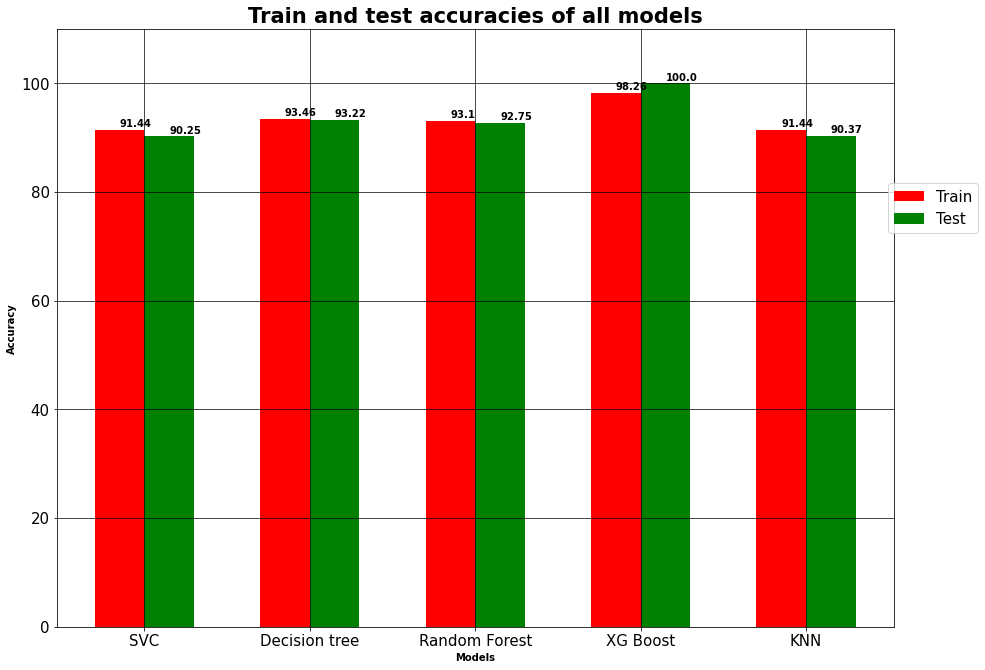

In [106]:
x = np.arange(len(label))  
width = 0.3
# Figure Size 
fig, ax = plt.subplots(figsize=(15, 11))

# creating the bar plot
bar1 = ax.bar(x - width/2, train_acc, width, label='Train',color='red')
bar2 = ax.bar(x + width/2, test_acc, width, label='Test',color='green')

# put labels
ax.set_ylabel('Accuracy',fontsize=10,fontweight='bold')
ax.set_xlabel('Models',fontsize=10,fontweight='bold')
ax.set_title('Train and test accuracies of all models',fontsize=21,fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_ylim([0, 110])
ax.legend(loc='center right', bbox_to_anchor=(1.11, 0.7))

# to annotate
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",fontsize=10,fontweight='bold')
autolabel(bar1)
autolabel(bar2)
plt.grid(b = True, color ='black', linestyle ='-', linewidth = 0.7, alpha = 1.0)

plt.show()

- ## Comparing the AUC values of all the models

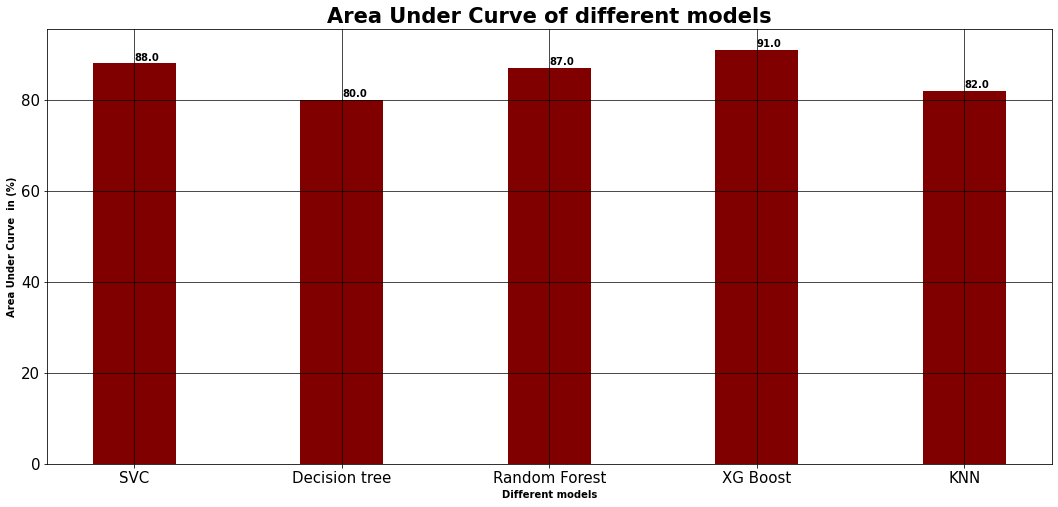

In [107]:
# Figure Size 
fig, ax = plt.subplots(figsize =(18, 8)) 
# creating the bar plot 
bar1=plt.bar(label,auc_values, color ='maroon',  
        width = 0.4) 
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",fontsize=10,fontweight='bold')

autolabel(bar1)
# Add x, y gridlines 
ax.grid(b = True, color ='black', linestyle ='-', linewidth = 0.7, alpha = 1.0) 
plt.xlabel("Different models",fontsize=10,fontweight='bold') 
plt.ylabel("Area Under Curve  in (%)",fontsize=10,fontweight='bold') 
plt.title("Area Under Curve of different models",fontsize=21,fontweight='bold') 
plt.show() 

## <span style="background-color: yellow">Conclusion</span>: From, above charts we have identified that XGBoost is the best model with 98% accuracy and 91% area under curve value.